In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder  #standartlaştırma için eklendi
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
df=pd.read_csv("https://productphilosophy.com/customers.csv",sep=';')


In [23]:
df.shape

(3333, 20)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [25]:
y=df["churn"]

In [26]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df_le=df.copy()

In [29]:
le.fit(df_le['push status'])

LabelEncoder()

In [30]:
list(le.classes_)

['no', 'yes']

In [31]:
df_le['push status']=le.transform(df_le['push status'])

In [32]:
le.fit(df_le['credit card info save'])
df_le['credit card info save']=le.transform(df_le['credit card info save'])

In [33]:
df_le.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,0,1,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,0,1,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,0,0,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,1,0,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,1,0,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [34]:
df=df_le

In [35]:
y=df[["churn"]]

In [36]:
x=df.drop(['churn','user id'],axis=1)

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   credit card info save                3333 non-null   int32 
 3   push status                          3333 non-null   int32 
 4   add to wishlist                      3333 non-null   int64 
 5   desktop sessions                     3333 non-null   int64 
 6   app sessions                         3333 non-null   int64 
 7   desktop transactions                 3333 non-null   int64 
 8   total product detail views           3333 non-null   int64 
 9   session duration                     3333 non-null   int64 
 10  promotion clicks                     3333 non-null   int64 
 11  avg order value                      3333 n

In [41]:
x['avg order value']=x['avg order value'].str.replace(',','.').astype(float)
x['discount rate per visited products']=x['discount rate per visited products'].str.replace(',','.').astype(float)
x['product detail view per app session']=x['product detail view per app session'].str.replace(',','.').astype(float)
x['add to cart per session']=x['add to cart per session'].str.replace(',','.').astype(float)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [43]:
model=RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

In [44]:
feature_imp=pd.Series(model.feature_importances_,index=x_train.columns)

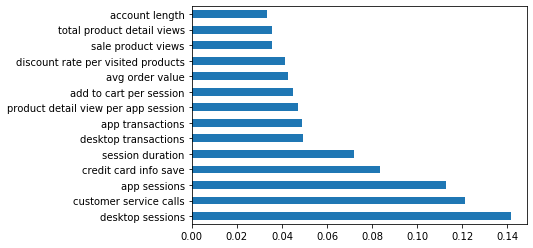

In [45]:
feature_imp.nlargest(14).plot(kind="barh")

In [48]:
y_pred=model.predict(x_test)

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.23485288011808625

In [50]:
confusion_matrix(y_test,y_pred)

array([[705,   4],
       [ 42,  83]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       709
           1       0.95      0.66      0.78       125

    accuracy                           0.94       834
   macro avg       0.95      0.83      0.88       834
weighted avg       0.95      0.94      0.94       834



TUNİNG

In [52]:
model_params={"n_estimators":[200,500,1000,2000],
             "max_depth": [5,8,10],
             "min_samples_split":[2,10,80,100],
             "max_features":[2,5,10]}

In [53]:
model_cv=GridSearchCV(model,model_params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s


KeyboardInterrupt: 